<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
# Analysis Of Customer_Churn_Data

## Table Of Contents

[1. General Overview](#1.-General-Overview)
    
   - [i. Project Goals](#i.-Project-Goals)

[2. Import Libraries](#2.-Import-Libraries)

[3. Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)

[4. Statistical Analysis](#4.-Statistical-Analysis)

   - [i. Descriptive Statistics](#i.-Descriptive-Statistics)
    
   - [ii. Confidence Intervals](#ii.-Confidence-Intervals)
    
   - [iii. A/B Test Hypothesis](#iii.-A/B-Test-Hypothesis)
    
   - [iv. Analysis Of Variance (ANOVA) Hypothesis Test](#iv.-Analysis-Of-Variance-(ANOVA)-Hypothesis-Test)

[5. Feature Engineering and Modelling](#5.-Feature-Engineering-and-Modelling)
    
   - [i. Feature Selection](#i.-Feature-Selection)
    
   - [ii. Train/Test Split](#ii.-Train/Test-Split)
    
   - [iii. Feature Scaling](#iii.-Feature-Scaling)

   - [iv. Naive Bayes](#iv.-Naive-Bayes)
    
   - [V. Confusion Matrix](#V.-Confusion-Matrix)
    
   - [vi. Decision Trees](#vi.-Decision-Trees)
    
   - [vii. Cross-Validated Hyperparameter Tuning](#vii.-Cross-Validated-Hyperparameter-Tuning)

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
## 1. General Overview

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
Customer churn refers to the situation whereby customers discontinue their relationship or subscription with a company or service provider. It represents the rate at which customers stop using a company's products or services within a specific period. Churn is an important metric for businesses as it directly impacts revenue, growth, and customer retention. If we can predict customers who are likely to churn, we can take measures to retain them before they do.These measures could be promotions, discounts, or other incentives to boost customer satisfaction and, therefore, retention.
In the context of the Churn dataset, the churn label indicates whether a customer has churned(represented by 1) or stayed(represented by 0). A churned customer is one who has decided to discontinue their subscription or usage of the company's services. On the other hand, a non-churned customer is one who continues to remain engaged and retains their relationship with the company.

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

## i. Project Goals

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

### The aim of this project is two-fold:

### A.) Perform various analyses(statistical, exploratory) to understand the dataset and its features.

### B.) Build an accurate model to predict Churn based on features in the dataset.

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
## 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
import pickle
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score,ConfusionMatrixDisplay
#from xgboost import XGBClassifier

In [2]:
train_data= pd.read_csv('C:\\Users\\Ebuka\\Downloads\\customer_churn_dataset-training-master.csv')
test_data= pd.read_csv('C:\\Users\\Ebuka\\Downloads\\customer_churn_dataset-testing-master.csv')

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
## 3. Exploratory Data Analysis
Exploratory Data Analysis or EDA is the process of investigating, organizing and analyzing datasets and summarizing their main features, often employing data wrangling and visualization methods. The steps taken in EDA are in no particular order and are as follows:
* Discovering
* Structuring
* Cleaning
* Joining
* Validating
* Presenting

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

### Join Train Data and Test Data

In [3]:
#This is necessary so as to ensure proper splitting during modelling
full_data= pd.concat([train_data,test_data],axis=0).reset_index()

In [4]:
#drop index column
customer_data= full_data.drop("index",axis=1)

In [5]:
# Create a copy of the data and assign to a variable df
df= customer_data.copy()

In [6]:
#set option to display all rows
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [7]:
#To get general information about the data showing number of columns and rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [8]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [9]:
list(df.columns)

['CustomerID',
 'Age',
 'Gender',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Subscription Type',
 'Contract Length',
 'Total Spend',
 'Last Interaction',
 'Churn']

In [10]:
adjusted_columns= {col:col.replace(' ','_')for col in df.columns}
df= df.rename(columns=adjusted_columns)
list(df.columns)

['CustomerID',
 'Age',
 'Gender',
 'Tenure',
 'Usage_Frequency',
 'Support_Calls',
 'Payment_Delay',
 'Subscription_Type',
 'Contract_Length',
 'Total_Spend',
 'Last_Interaction',
 'Churn']

In [11]:
df.shape

(505207, 12)

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

### Check For Null Values?

In [12]:
# sum of all null values in each column
df.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage_Frequency      1
Support_Calls        1
Payment_Delay        1
Subscription_Type    1
Contract_Length      1
Total_Spend          1
Last_Interaction     1
Churn                1
dtype: int64

In [13]:
# drop rows with missing information and reassign to variable
df= df.dropna(axis=0)

In [14]:
# check to make sure columns have been dropped
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage_Frequency      0
Support_Calls        0
Payment_Delay        0
Subscription_Type    0
Contract_Length      0
Total_Spend          0
Last_Interaction     0
Churn                0
dtype: int64

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
### Check for Duplicates?

In [15]:
print("Duplicates:",df.duplicated().any())

Duplicates: False


<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

### Let's Plot a Pie Chart to know the Percentage of Customers that Churned and those who stayed.

(-1.0999997566073176,
 1.0999999884098723,
 -1.0999937182669768,
 1.0999989233566834)

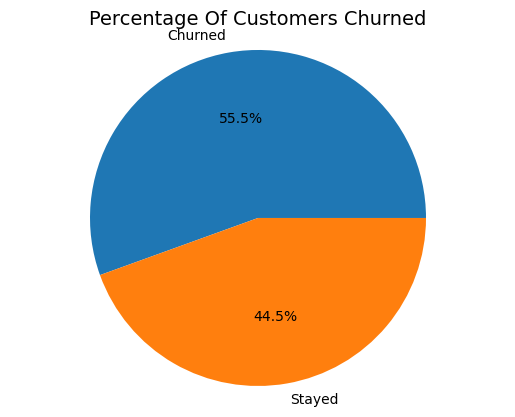

In [16]:
total= df["Churn"].value_counts()
#total
total= total.rename({1.0:"Churned",0.0:"Stayed"})
fig,ax= plt.subplots()
ax.pie(total,autopct='%1.1f%%',labels=total.index,shadow=None)
plt.title("Percentage Of Customers Churned",fontsize=14)
ax.axis("equal")

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">From the above chart we can see that the distribution is fairly balanced, so there would be no need for upsampling or downsampling of the data.

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

### Compare the Gender with Churn Rate

(-1.0999997426925472,
 1.0999999877472642,
 -1.0999937939731421,
 1.0999989362678637)

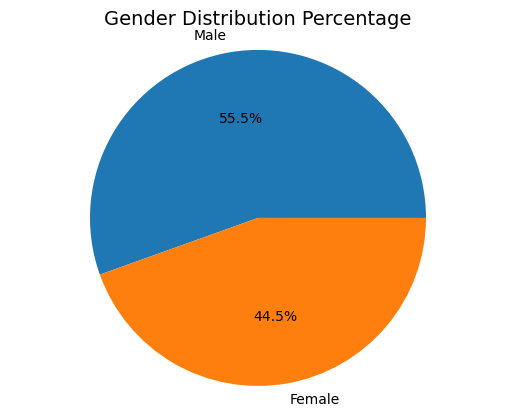

In [17]:
total= df["Gender"].value_counts()
#total
fig,ax= plt.subplots()
ax.pie(total,autopct='%1.1f%%',labels=total.index, shadow=None)
plt.title("Gender Distribution Percentage",fontsize=14)
ax.axis("equal")

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">The distribution shows Male constitute a Majority of the Customers.

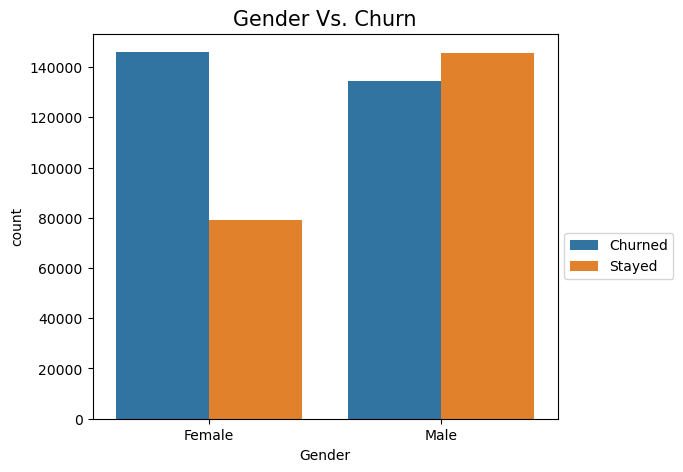

In [18]:
gender_churned= df.groupby(["Gender"])["Churn"].value_counts()
gender_churned
gender_churned= gender_churned.rename({1.0:"Churned",0.0:"Stayed"})
gender_churned= pd.DataFrame(gender_churned)
gender_churned= gender_churned.rename(columns={"Churn":"Count"}).reset_index()
gender_churned
plt.figure(figsize=(6,5))
sns.barplot(x=gender_churned["Gender"],y=gender_churned["count"], hue=gender_churned["Churn"])
plt.title("Gender Vs. Churn", fontsize=15)
plt.legend(bbox_to_anchor=[1.0, 0.5])

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

>The Male category shows a higher number of males who stayed and also a high number churned, while in the female category their is a marked difference showing a high number of them churned while less of them stayed. Therefore, we can say that more Females are eager to churn.

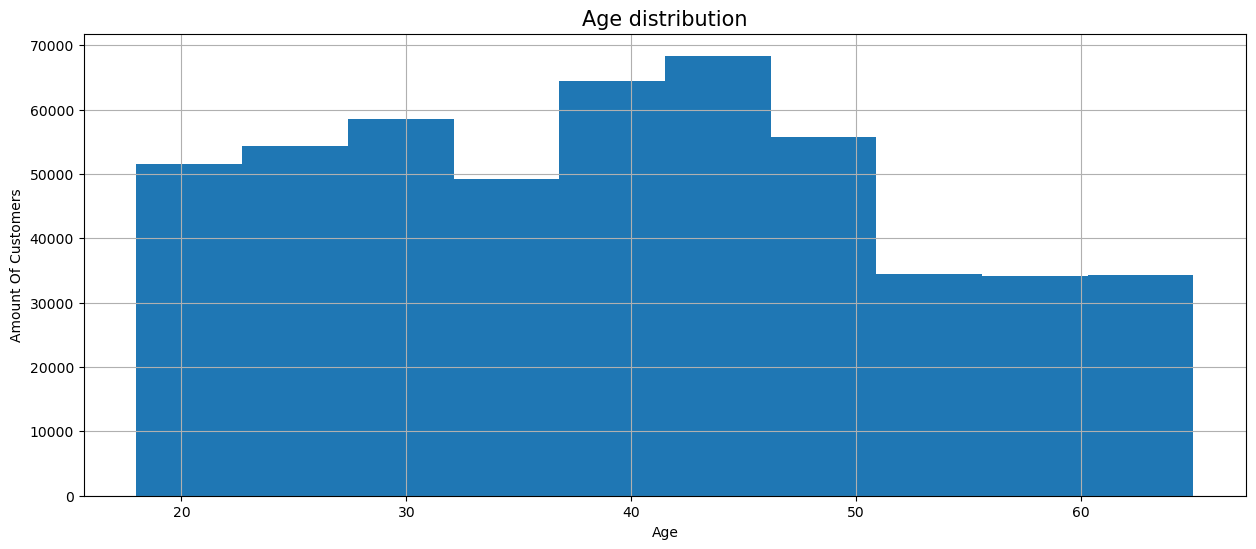

In [19]:
df["Age"].hist(figsize=(15,6))
plt.xlabel("Age")
plt.ylabel("Amount Of Customers")
plt.title("Age distribution", fontsize=15)
plt.show()

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

>The Age distribution shows that highest concentration of customers are found in the age bracket of 20-50 years.

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

### Group By Age Range Vs. Churn

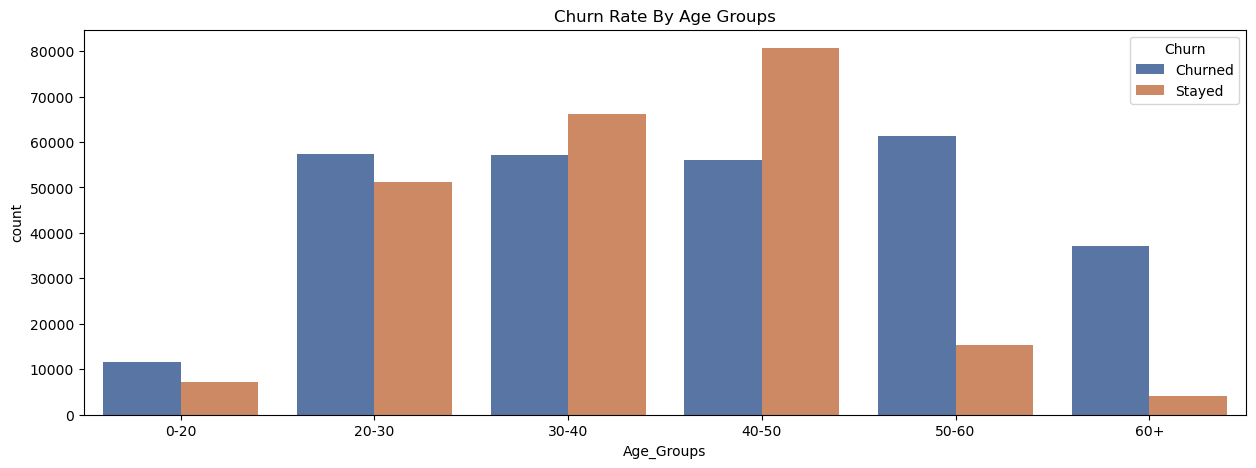

In [20]:
age_bins=[0, 20, 30, 40, 50, 60, float('inf')]
age_labels=["0-20", "20-30", "30-40", "40-50", "50-60", "60+"]
df["Age_Groups"]= pd.cut(x=df["Age"], bins=age_bins, labels=age_labels, right=False)
age_churn_rate= df.groupby('Age_Groups')["Churn"].value_counts()
age_churn_rate= age_churn_rate.rename({1:"Churned",0:"Stayed"})
plt.figure(figsize=(15,5))
plt.title("Churn Rate By Age Groups")
age_churn_rate= pd.DataFrame(age_churn_rate).rename(columns={"Churn":"Count"}).reset_index()
sns.barplot(x=age_churn_rate["Age_Groups"], 
            y=age_churn_rate["count"],
            hue=age_churn_rate["Churn"],palette='deep')
plt.show()

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

>The Age Group of 40-50 has the highest number of customers who Stayed.
    
>The Age Group of 50-60 has the highest number of customers who Churned.

In [21]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn,Age_Groups
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,30-40
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,60+
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,50-60
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,50-60
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,20-30


<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
### Now Compare The Subscription Type to the Churn Rate

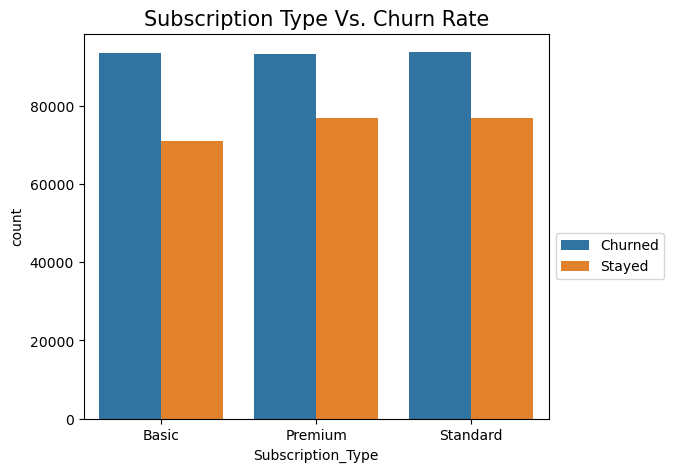

In [22]:
grouped_subscription= df.groupby(["Subscription_Type"])["Churn"].value_counts()
grouped_subscription
grouped_subscription= grouped_subscription.rename({1:"Churned",0:"Stayed"})
grouped_subscription= pd.DataFrame(grouped_subscription)
grouped_subscription= grouped_subscription.rename(columns={"Churn":"Count"}).reset_index()
grouped_subscription
plt.figure(figsize=(6,5))
sns.barplot(x=grouped_subscription["Subscription_Type"],y=grouped_subscription["count"], hue=grouped_subscription["Churn"])
plt.title("Subscription Type Vs. Churn Rate",fontsize=15)
plt.legend(bbox_to_anchor=[1.0, 0.5])

All Subscription types show that the number of customer who churned are more than those who stayed. There is no clear difference in the distribution among the three categories.

### Contract Length Vs. Churn

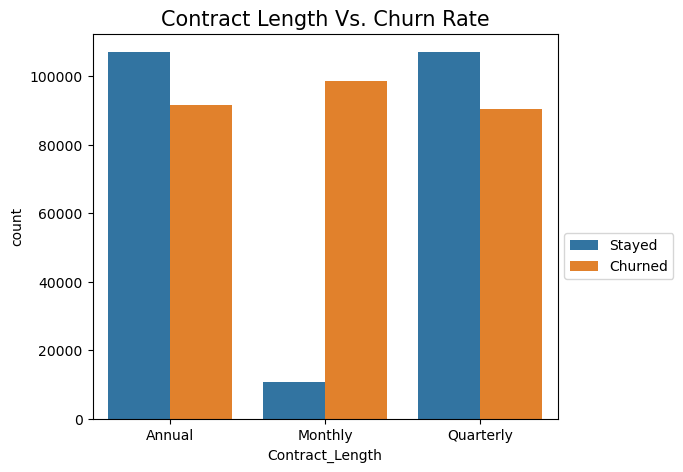

In [23]:
grouped_contract_length= df.groupby(["Contract_Length"])["Churn"].value_counts()
grouped_contract_length
grouped_contract_length= grouped_contract_length.rename({1:"Churned",0:"Stayed"})
grouped_contract_length= pd.DataFrame(grouped_contract_length)
grouped_contract_length= grouped_contract_length.rename(columns={"Churn":"Count"}).reset_index()
grouped_contract_length
plt.figure(figsize=(6,5))
sns.barplot(x=grouped_contract_length["Contract_Length"],y=grouped_contract_length["count"], hue=grouped_contract_length["Churn"])
plt.title("Contract Length Vs. Churn Rate",fontsize=15)
plt.legend(bbox_to_anchor=[1.0, 0.5])

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

>The chart above shows that customers who are on a Monthly contract are more likely to leave as compared to those who are on an Annual or Quarterly contract.

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
### A HeatMap to show the correlation between Features and Target Variable.

<Axes: >

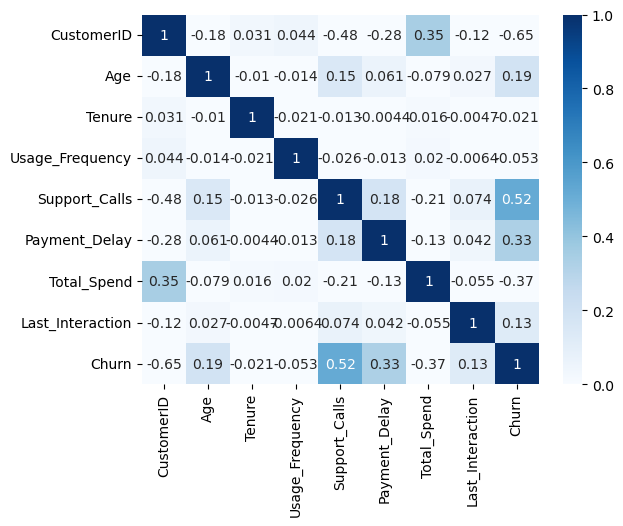

In [24]:
sns.heatmap(df.corr(method="pearson",numeric_only=True),
            vmin=0,
            vmax=1,
            cmap="Blues",
            annot=True)

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

>The columns "Support Calls" and "Payment Delay" show a weak positive correlation to churn as against all other columns. However among all features, "Support Calls" show the highest correlation with "Churn"

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
### Support Calls Vs. Churn

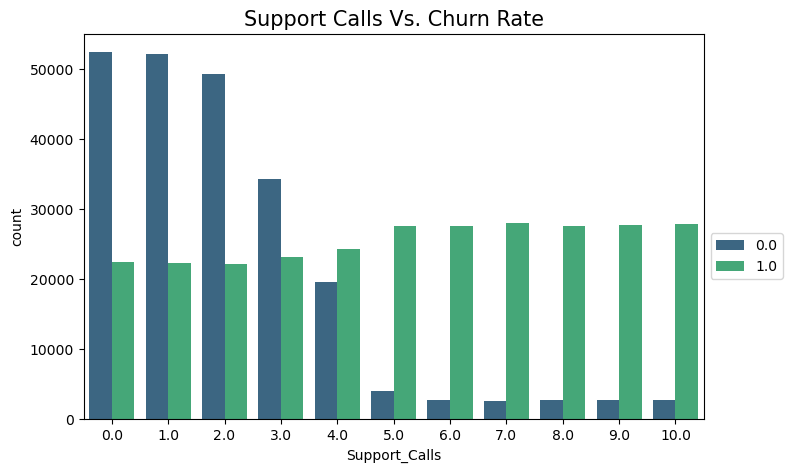

In [25]:
grouped_support_calls= df.groupby(["Support_Calls"])["Churn"].value_counts()
grouped_support_calls= pd.DataFrame(grouped_support_calls).rename(columns={"Churn":"Count"}).reset_index()
grouped_support_calls
plt.figure(figsize=(8,5))
sns.barplot(x=grouped_support_calls["Support_Calls"],
            y=grouped_support_calls["count"], 
            hue=grouped_support_calls["Churn"],palette = 'viridis')
plt.title("Support Calls Vs. Churn Rate",fontsize=15)
plt.legend(bbox_to_anchor=[1.0, 0.5])

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

>Churned Customers increase as the number of Support Calls increase. While those with less Support Calls stayed.

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
### Payment Delay Vs. Churn

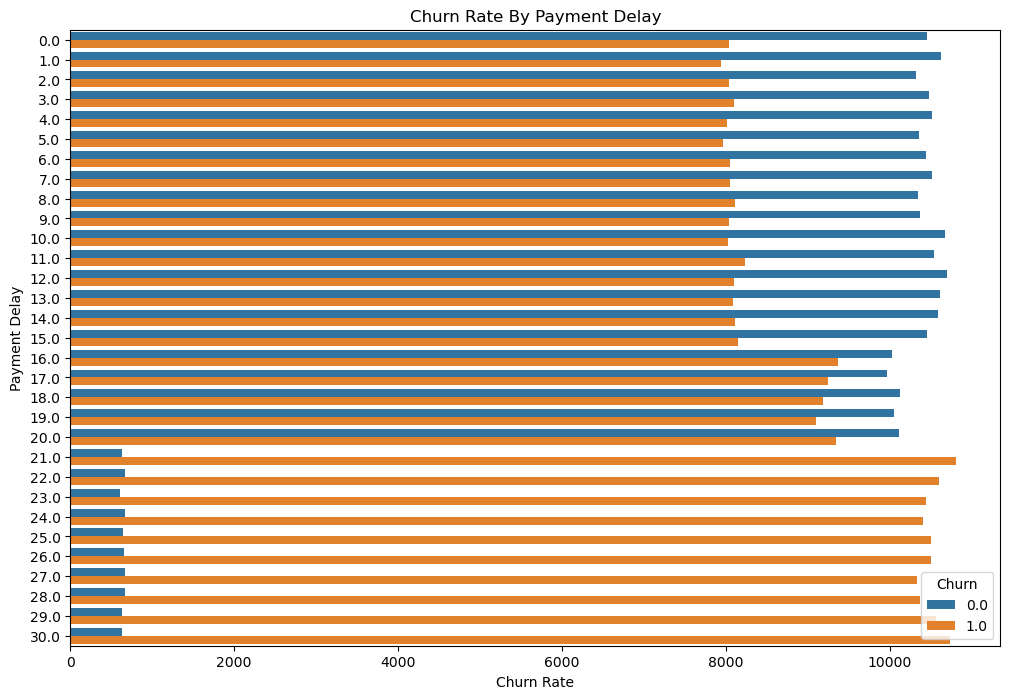

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, y="Payment_Delay", hue="Churn")
plt.xlabel('Churn Rate')
plt.ylabel("Payment Delay")
plt.title("Churn Rate By Payment Delay")
plt.show()

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

>This Plot follows a Uniform Distribution across Payment Delay. 
    
>However the amount of customers who stayed reduced abruptly after the 20th month.This goes to show that most customers churned after the 20th month of Payment Delay.

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
### Total Spend Vs. Churn

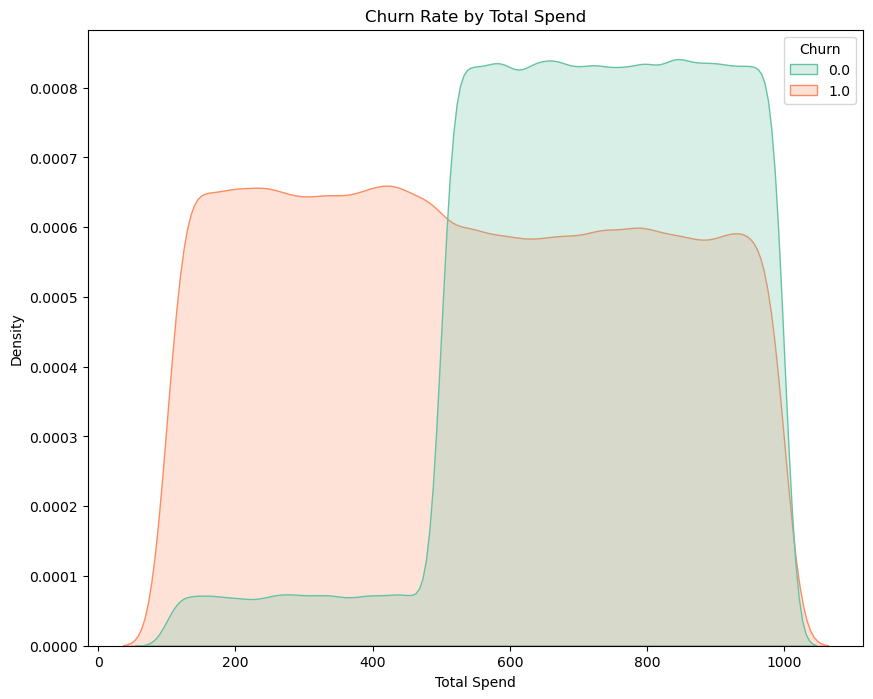

In [27]:
plt.figure(figsize = (10,8))
sns.kdeplot(data = df , x = 'Total_Spend' ,hue = 'Churn', fill = True , palette = 'Set2')
plt.title('Churn Rate by Total Spend')
plt.xlabel('Total Spend')
plt.show()

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

>This distribution plot shows that customers who spend from $500 and above are more likely to Stay. 

>Customers who churned follow a uniform distribution.

Text(0.5, 1.0, 'Last Interaction Vs. Churn Rate')

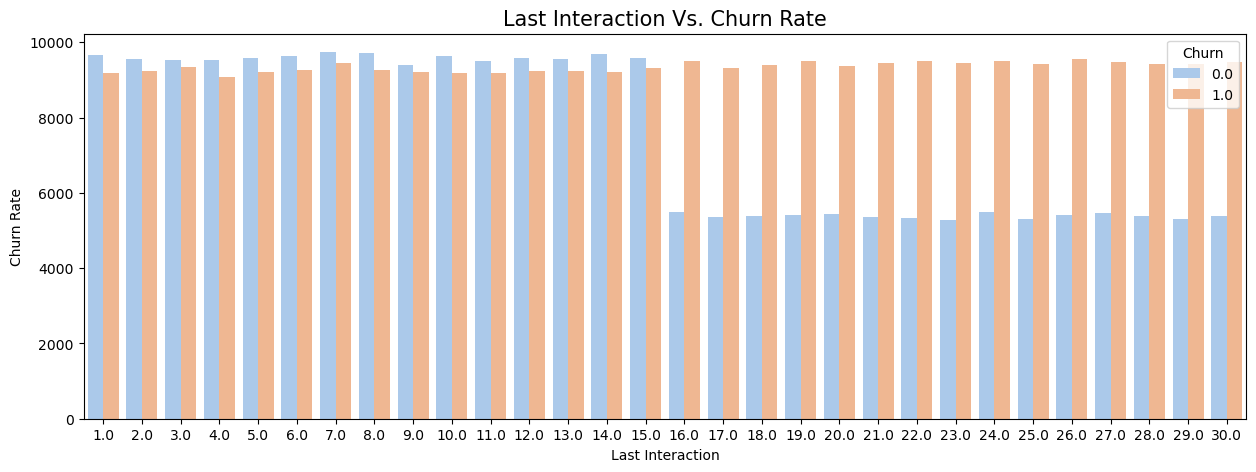

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="Last_Interaction", hue="Churn", palette="pastel")
plt.xlabel("Last Interaction")
plt.ylabel("Churn Rate")
plt.title("Last Interaction Vs. Churn Rate",fontsize=15)

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

>This feature follows a Uniform Distribution. However, the number of customers reduced after the 15th Interaction. 

>Customers tend not to stay after the 15th Interaction.

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

# 4. Statistical Analysis

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

## i. Descriptive Statistics
Descriptive Statistics describe or summarize the main features of a datatset.

In [29]:
df.describe()

,CustomerID,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

>The above table shows the summary statistics of all the features in the dataset including the target variable("Churn"). 

>From the heatmap we created earlier, we saw that "Support Calls" feature had the strongest postitive correlation with Churn rate. This will be an important feature to consider when building our model.
    
>Next, we examine the **Support Calls** column for **Outliers**.

In [30]:
def histogram_plots(df,column,x,y,z):
    df[column].hist(figsize=(15,5))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(z, fontsize=15)
    plt.show()

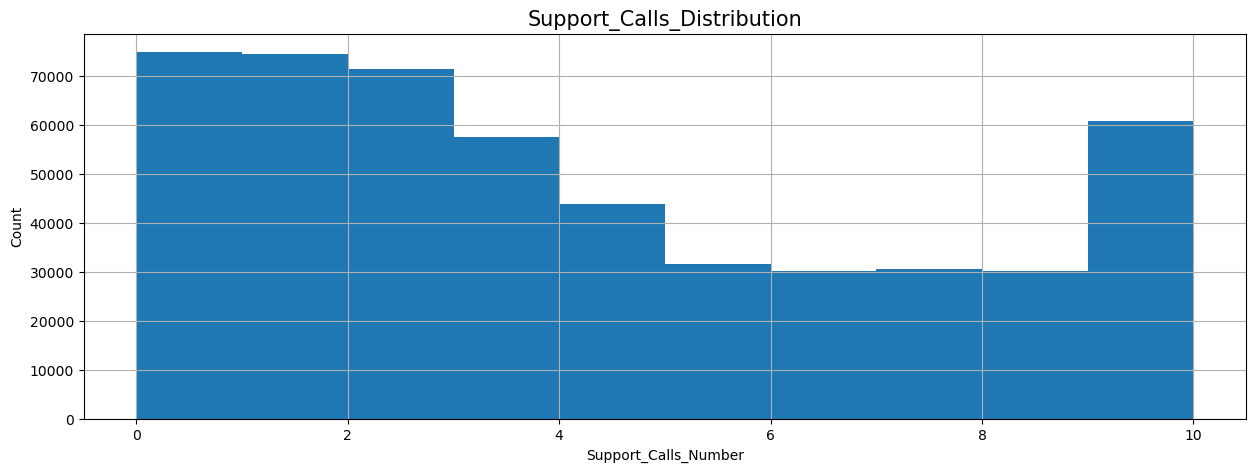

In [31]:
histogram_plots(df,'Support_Calls','Support_Calls_Number','Count','Support_Calls_Distribution')

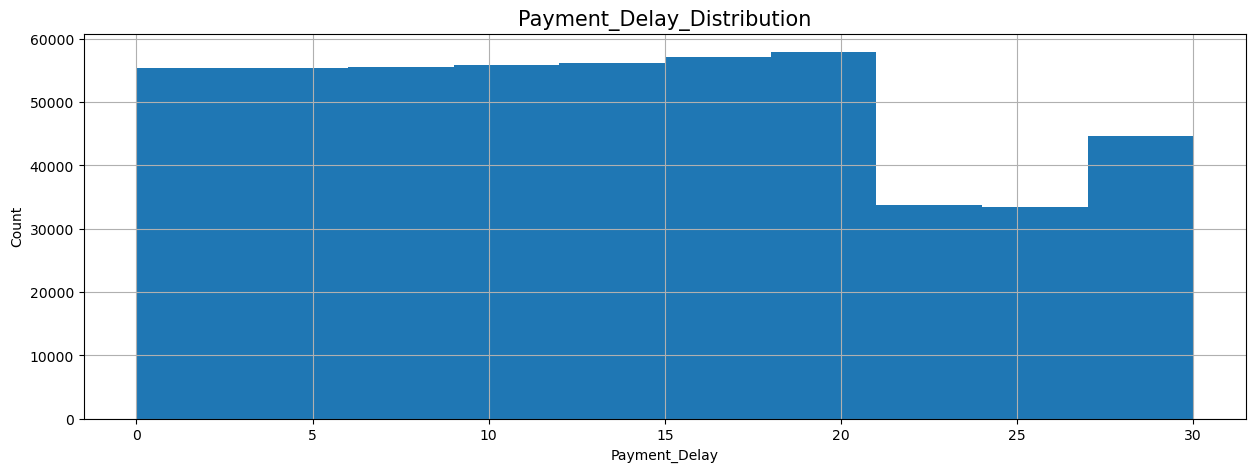

In [32]:
histogram_plots(df,"Payment_Delay", "Payment_Delay", "Count", "Payment_Delay_Distribution")

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
### Removing Outliers Using Z-Scores.
    
**z-score** is a measure of how many standard deviations below or above the population mean a data point is. A z-score is useful because it tells you where a value lies in a distribution. 

**z-scores** are always used for outlier detection. Typically, observations with a z-score smaller than -3 or larger than +3 are considered as outliers. In other words, these are values that lie more than +/- 3 SDs from the mean. 
    
To find outliers in the data, we will first create a new column called **Z_SCORE** that includes the z-scores for each "Support Calls".  

Then, we will compute the z-scores using the function **scipy.stats.zscore()**.

In [33]:
df["Support_Calls"].describe()

count    505206.000000
mean          3.833317
std           3.133603
min           0.000000
25%           1.000000
50%           3.000000
75%           6.000000
max          10.000000
Name: Support_Calls, dtype: float64

In [34]:
# assign the mean to a variable
average_support_calls= df["Support_Calls"].mean()

# assign the standard_deviation to a variable
std_support_calls= df["Support_Calls"].std()

print("Average_Support_Calls:",average_support_calls)
print()
print("Standard_Deviation_Support_Calls:",std_support_calls)

Average_Support_Calls: 3.8333174982086513

Standard_Deviation_Support_Calls: 3.133602564999572


In [35]:
# Compute the Z_Scores for each row
df["Z_Score"]= stats.zscore(df["Support_Calls"],ddof=1)
df.head()

,CustomerID,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn,Age_Groups,Z_Score
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,30-40,0.372313
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,60+,1.967921
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,50-60,0.691435
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,50-60,1.010557
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,20-30,0.372313


In [36]:
df[(df["Z_Score"]>3) | (df["Z_Score"]<-3)]

,CustomerID,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn,Age_Groups,Z_Score


<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

>From the above result we can see that no values are displayed as exceeded the threshold we defined.
    
>Therefore we can say there are no outliers.

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

## ii. Confidence Intervals
Confidence Intervals are used to measure how confident we are about estimating a population parameter like a mean or proportion based on a sample from the population. To understand confidence intervals and its application we'll build a scenario around our dataset and use confidence intervals to get an estimate. 

>**Scenario**: You have been asked to find the average amount each customer spends. The dataset consists of about half a million entries, which is too large to compute individually so you take a sample from the population and provide an estimate of the average spend for the population mean based on your sample.
    
>**Steps to Construct a confidence interval**
1.   Identify a sample statistic
2.   Choose a confidence level
3.   Find the margin of error 
4.   Calculate the interval

In [37]:
#Create a random sample of 1000 samples
sampled_data = df.sample(n=1000, replace=True, random_state=101)
sampled_data

,CustomerID,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn,Age_Groups,Z_Score
176991,181802.0,50.0,Male,55.0,3.0,7.0,28.0,Basic,Monthly,393.00,10.0,1.0,50-60,1.010557
214540,219989.0,39.0,Male,16.0,21.0,5.0,0.0,Basic,Quarterly,433.83,19.0,1.0,30-40,0.372313
476498,35666.0,57.0,Female,40.0,21.0,1.0,1.0,Basic,Annual,762.00,1.0,0.0,50-60,-0.904173
204615,209650.0,48.0,Male,8.0,11.0,10.0,6.0,Premium,Quarterly,102.90,2.0,1.0,40-50,1.967921
136767,141326.0,57.0,Female,39.0,21.0,10.0,10.0,Standard,Annual,490.00,12.0,1.0,50-60,1.967921
311896,319011.0,41.0,Male,15.0,10.0,2.0,3.0,Standard,Quarterly,857.42,7.0,0.0,40-50,-0.585051
55293,56312.0,25.0,Female,32.0,15.0,6.0,29.0,Premium,Monthly,731.00,3.0,1.0,20-30,0.691435
471116,30284.0,40.0,Male,28.0,19.0,4.0,19.0,Standard,Quarterly,385.00,18.0,0.0,40-50,0.053192
413680,420795.0,43.0,Male,14.0,20.0,2.0,5.0,Premium,Quarterly,746.10,1.0,0.0,40-50,-0.585051
228746,234795.0,48.0,Female,10.0,2.0,3.0,11.0,Basic,Quarterly,800.04,25.0,1.0,40-50,-0.265930


In [38]:
#Calculate the sample mean
sample_mean= sampled_data["Total_Spend"].mean()

In [39]:
#Calculate the standard error
estimated_standard_error= sampled_data["Total_Spend"].std()/np.sqrt(sampled_data.shape[0])
estimated_standard_error

7.779364634591501

In [40]:
#Using a 95% Confidence Interval calculate the confidence interval for the total amount spent.
stats.norm.interval(confidence=0.95, loc=sample_mean, scale=estimated_standard_error)

(611.890655493596, 642.385204506404)

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

>Interpretation: The results shows 95% CI:(611.89,642.38)
    
>This means that there is a 95% confidence interval that the average amount spent by each customer in the total population falls between 611.89 and 642.38.
   
>What this implies is that if you took 100 random samples from this population. Their population mean would be between this interval.

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

## iii. A/B Test Hypothesis
A Hypothesis Test is a test of significance. It uses sample data to evaluate an assumption about a population parameter.These are the steps to conducting a hypothesis test:
#### Step 1: State the null hypothesis and the alternative hypothesis.
#### Step 2: Choose a significance level.
#### Step 3: Find the P-Value.
#### Step 4: Reject or fail to reject the null hypothesis.

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
### Hypothesis Test One
- Determine if the difference in Total Spend between the **Male** and **Female** customers is statistically significant or it occurs by chance.
    

* $H_0$: There is no difference between the number of male and female customers.
   
    
* $H_A$: There is a difference between the number of male and female customers.


In [41]:
#Create a variable for the male and female categories
df_male= df[df["Gender"]=="Male"]
df_female= df[df["Gender"]=="Female"]

In [42]:
#Randomly sample 1000 observations from your dataset
sample_male= df_male.sample(n=1000,replace=True,random_state=101)
sample_female= df_female.sample(n=1000,replace=True,random_state=101)

In [43]:
#average total spend for males
sample_male["Total_Spend"].mean()

628.4287099999999

In [44]:
#average total spend for females
sample_female["Total_Spend"].mean()

601.49585

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

> Based on the sampled data, we can see that there is a difference of about $27 between the total_spent between the male and female.

>At this point we might be tempted to conclude that the males have a higher spend than the females, however this may be due to sampling variability. 

>A hypothesis test can help us determine whether or not our results are statistically significant.

In [45]:
stats.ttest_ind(a=sample_male["Total_Spend"], b=sample_female["Total_Spend"], equal_var=False)

TtestResult(statistic=2.4642662646571516, pvalue=0.013813644700827528, df=1983.7369036011198)

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

> The pvalue is 0.0138 or 1.3% while the significance level is 0.05 or 5%. 

> Since the pvalue is less than the significance level, we reject the null hypothesis and conclude that there is a statistically significant difference.

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

## iv. Analysis Of Variance (ANOVA) Hypothesis Test
ANOVA is used to compare the mean of a continuous variable with three or more groups of one or two categorical variables.
>This Hypothesis test aims to determine if the differences between total amount spent by customers in each category(Annual,Monthly,Quarterly) is statistically significant or due to chance.

<Axes: xlabel='Contract_Length', ylabel='Total_Spend'>

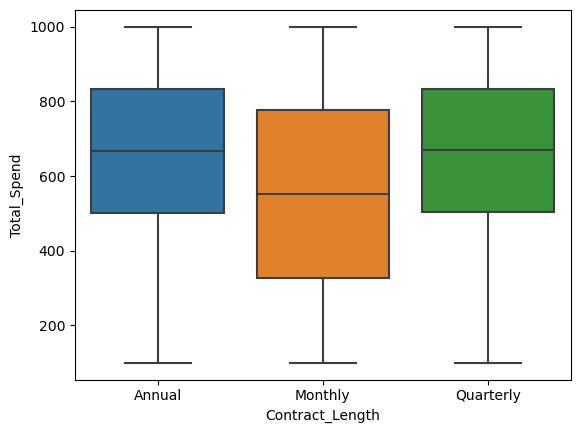

In [46]:
#create a boxplot to show distribution of Total_Spend by Contract_Length
sns.boxplot(x="Contract_Length", y="Total_Spend", data=df)

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
>The above boxplot shows a difference in total_spend between the three categories. 
    
>However, we cannot know if this difference is statistically significant or due to chance, hence the need for ANOVA.

In [47]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn,Age_Groups,Z_Score
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,30-40,0.372313
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,60+,1.967921
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,50-60,0.691435
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,50-60,1.010557
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,20-30,0.372313


In [48]:
ols_formula = "Total_Spend ~ C(Contract_Length)"

data=df

OLS = ols(formula = ols_formula, data = data)

# Fit the model.

### YOUR CODE HERE ### 

model = OLS.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Spend   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     5735.
Date:                Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:54:44   Log-Likelihood:            -3.4911e+06
No. Observations:              505206   AIC:                         6.982e+06
Df Residuals:                  505203   BIC:                         6.982e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         639.0415      0.544   1174.005      0.000     637.975     640.108
C(Contract_Length)[T.Monthly]     -88.5605      0.914    -96.916      0.000     -90.351     -86.769
C(Contract_Length)[T.Quarterly]     0.4594      0.771      0.596      0.551      -1.052       1.971
==============================================================================
Omnibus:                    54444.929   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25108.485
Skew:                          -0.370   Prob(JB):                         0.00
Kurtosis:                       2.197   Cond. No.                         3.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
We start by Defining the **Null** and **Alternative** **Hypothesis**.
    
#### Null Hypothesis

$$H_0: TotalSpend(Annual)=TotalSpend(Monthly)=TotalSpend(Quarterly)$$

There is no difference in the total_spend by customers based on the contract_length category.

#### Alternative Hypothesis

$$H_1: \text{Not } TotalSpend(Annual)=TotalSpend(Monthly)=TotalSpend(Quarterly)$$

There is a difference in the total_spend by customers based on the contract_length category.

In [49]:
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
C(Contract_Length),6.749788e+08,2.0,5735.155884,0.0
Residual,2.972903e+10,505203.0,NaN,NaN


<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
> The F-Statistic is 5735.15 and the P-Value is 0.0.
    
> The P-Value is less than the significance level of 0.05(5%) and therefore reject the null hypothesis that there is no difference in Total_Spent based on contract_length category.
    
>The Result of the One-Way ANOVA test indicate that you can reject the null hypothesis in favour of the alternative hypothesis
    
>Their is a statistically significant difference between in Total_Spent by customers based on contract_length category.

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
## 5. Feature Engineering and Modelling

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
## i. Feature Selection

In [50]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn,Age_Groups,Z_Score
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,30-40,0.372313
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,60+,1.967921
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,50-60,0.691435
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,50-60,1.010557
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,20-30,0.372313


<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

> We'll create a loyalty feature that represents the percentage of each customer's life that they were customers. We can do this by dividing `Tenure` by `Age` and multiplying by `100`.
    $$\text{Loyalty} = \frac{\text{Tenure}}{\text{Age}} * 100 $$

In [51]:
df["Loyalty"]= df["Tenure"]/df["Age"] * 100
df.head()

,CustomerID,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn,Age_Groups,Z_Score,Loyalty
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,30-40,0.372313,130.000000
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,60+,1.967921,75.384615
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,50-60,0.691435,25.454545
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,50-60,1.010557,65.517241
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,20-30,0.372313,139.130435


In [52]:
#Dummy encode categorical variables
df= pd.get_dummies(data=df, drop_first=True)
df.head()

,CustomerID,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction,Churn,Z_Score,Loyalty,Gender_Male,Subscription_Type_Premium,Subscription_Type_Standard,Contract_Length_Monthly,Contract_Length_Quarterly,Age_Groups_20-30,Age_Groups_30-40,Age_Groups_40-50,Age_Groups_50-60,Age_Groups_60+
0,2.0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,0.372313,130.000000,False,False,True,False,False,False,True,False,False,False
1,3.0,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,1.967921,75.384615,False,False,False,True,False,False,False,False,False,True
2,4.0,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,0.691435,25.454545,False,False,False,False,True,False,False,False,True,False
3,5.0,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,1.010557,65.517241,True,False,True,True,False,False,False,False,True,False
4,6.0,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,0.372313,139.130435,True,False,False,True,False,True,False,False,False,False


Text(0.5, 1.0, 'Correlation Between Features and Churn')

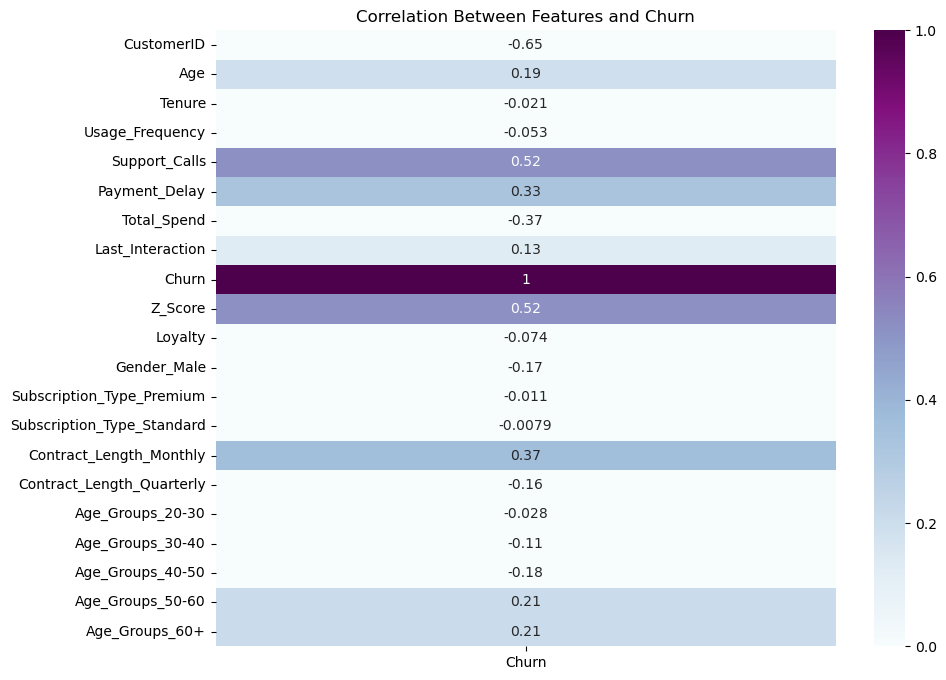

In [53]:
#feature selection
corr_matrix= df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix[["Churn"]],
            vmin=0,
            vmax=1,
            cmap="BuPu",
            annot=True)
plt.title("Correlation Between Features and Churn")

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
> The Plot above shows the Features with the highest **Correlation** with **Churn**.
    
> Most of the features have a weak correlation with the outcome variable.
    
> Support_Calls, Total_Spend and Payment_Delay features are all fairly correlated with the Outcome Variable(**Churn**).
  
> Though **Customer_ID** showed the strongest correlation, though it won't be used in the machine learning model because it serves as a unique identifier for each row and therefore not useful.
    
> Also, we will not use the **Z-scores** feature because it is an off-shoot from **Support_calls**.

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
## ii. Train/Test Split

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505206 entries, 0 to 505206
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  505206 non-null  float64
 1   Age                         505206 non-null  float64
 2   Tenure                      505206 non-null  float64
 3   Usage_Frequency             505206 non-null  float64
 4   Support_Calls               505206 non-null  float64
 5   Payment_Delay               505206 non-null  float64
 6   Total_Spend                 505206 non-null  float64
 7   Last_Interaction            505206 non-null  float64
 8   Churn                       505206 non-null  float64
 9   Z_Score                     505206 non-null  float64
 10  Loyalty                     505206 non-null  float64
 11  Gender_Male                 505206 non-null  bool   
 12  Subscription_Type_Premium   505206 non-null  bool   
 13  Subscription_Type_S

In [55]:
#Define X and Y
#X= df[['Support_Calls','Payment_Delay','Total_Spend','Z_Score']]
X= df.drop(['CustomerID',
           'Age',
           'Tenure',
           'Usage_Frequency',
           'Last_Interaction',
           'Churn','Loyalty',
           'Gender_Male',
           'Subscription_Type_Premium',
           'Subscription_Type_Standard',
           'Contract_Length_Monthly',
           'Contract_Length_Quarterly',
           'Age_Groups_20-30', 
           'Age_Groups_30-40', 'Age_Groups_40-50','Age_Groups_50-60','Age_Groups_60+'],axis=1)
y= df['Churn']


In [56]:
X.head()

,Support_Calls,Payment_Delay,Total_Spend,Z_Score
0,5.0,18.0,932.0,0.372313
1,10.0,8.0,557.0,1.967921
2,6.0,18.0,185.0,0.691435
3,7.0,7.0,396.0,1.010557
4,5.0,8.0,617.0,0.372313


In [57]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Churn, dtype: float64

In [58]:
#help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [59]:
X_train.shape

(378904, 4)

In [60]:
y_train.shape

(378904,)

In [61]:
X_test.shape

(126302, 4)

In [62]:
y_test.shape

(126302,)

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
## iii. Feature Scaling

In [63]:
# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Scale the training data
X_train_scaled = scaler.transform(X_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
## iv. Naive Bayes

In [64]:
# Fit the model
gnb_scaled = GaussianNB()
gnb_scaled.fit(X_train_scaled, y_train)

# Get the predictions on test data
y_preds = gnb_scaled.predict(X_test_scaled)

In [65]:
print('Accuracy_Score:', '%.3f' % accuracy_score(y_test, y_preds))
print('Precision_Score:', '%.3f' % precision_score(y_test,y_preds))
print('Recall_Score:', '%.3f' % recall_score(y_test, y_preds))
print('F1_Score:', '%.3f' % f1_score(y_test, y_preds))

Accuracy_Score: 0.824
Precision_Score: 0.898
Recall_Score: 0.771
F1_Score: 0.829


<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
>Our model shows an **Accuracy Score** of 82%.
    
>In classification problems, **Accuracy** is the most intuitive metric to measure model performance. Though if you have imbalanced classes, a model could appear accurate but be poor at balancing false negatives and false positives.
 
>**Precision** and **Recall Scores** are useful in evaluating the performance of a model because they balance the false positives and false negatives inherent in prediction.
    
>From the above we can see a **Precision Score** of 89.8%. This suggests that the model is quite good at predicting True Positives(i.e. Customers who will churn).

>The model shows a **Recall Score** of 77.1%. This suggests that the model is also good at predicting True Negatives(customers who stay) but with lesser accuracy while balancing out False Negatives.
    
>**F1_Score** balances the precision and recall performance to give a combined assessment of how well the model delivers predictions. In this case, an F1_Score of 82.9% suggests the model has a very good predictive performance in general.

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
## V. Confusion Matrix

In [66]:
# A helper function to calculate confusion matrix using any model.
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Return a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_,
                                 )
  
    disp.plot(values_format='') # `values_format=''` suppresses scientific notation
    plt.show()

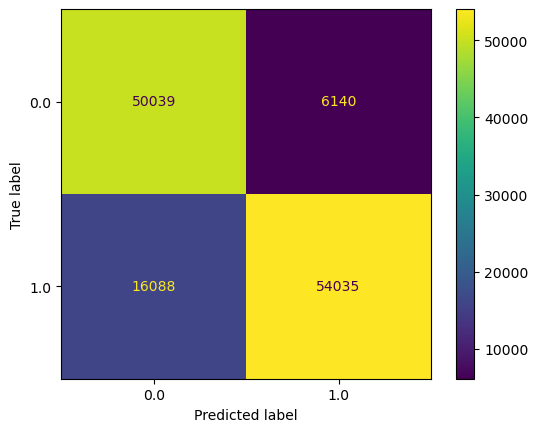

In [67]:
conf_matrix_plot(gnb_scaled, X_test_scaled, y_test)

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
## vi. Decision Trees 

In [68]:
#Instantiate the Model
decision_tree= DecisionTreeClassifier(random_state=0)

#Fit model to training data
decision_tree.fit(X_train, y_train)

#Make Predictions on X_data
dt_preds= decision_tree.predict(X_test)

In [69]:
#Generate Performance Metrics
print('Accuracy_Score:', '%.3f' % accuracy_score(y_test, dt_preds))
print('Precision_Score:', '%.3f' % precision_score(y_test,dt_preds))
print('Recall_Score:', '%.3f' % recall_score(y_test, dt_preds))
print('F1_Score:', '%.3f' % f1_score(y_test, dt_preds))

Accuracy_Score: 0.823
Precision_Score: 0.850
Recall_Score: 0.828
F1_Score: 0.838


<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
>The metrics for the decision tree reveals that it is an improvement to the **Naive Bayes** model we built earlier.
    
>We know this by observing the **F1_score** which is a balance of the Precision and Recall Scores.

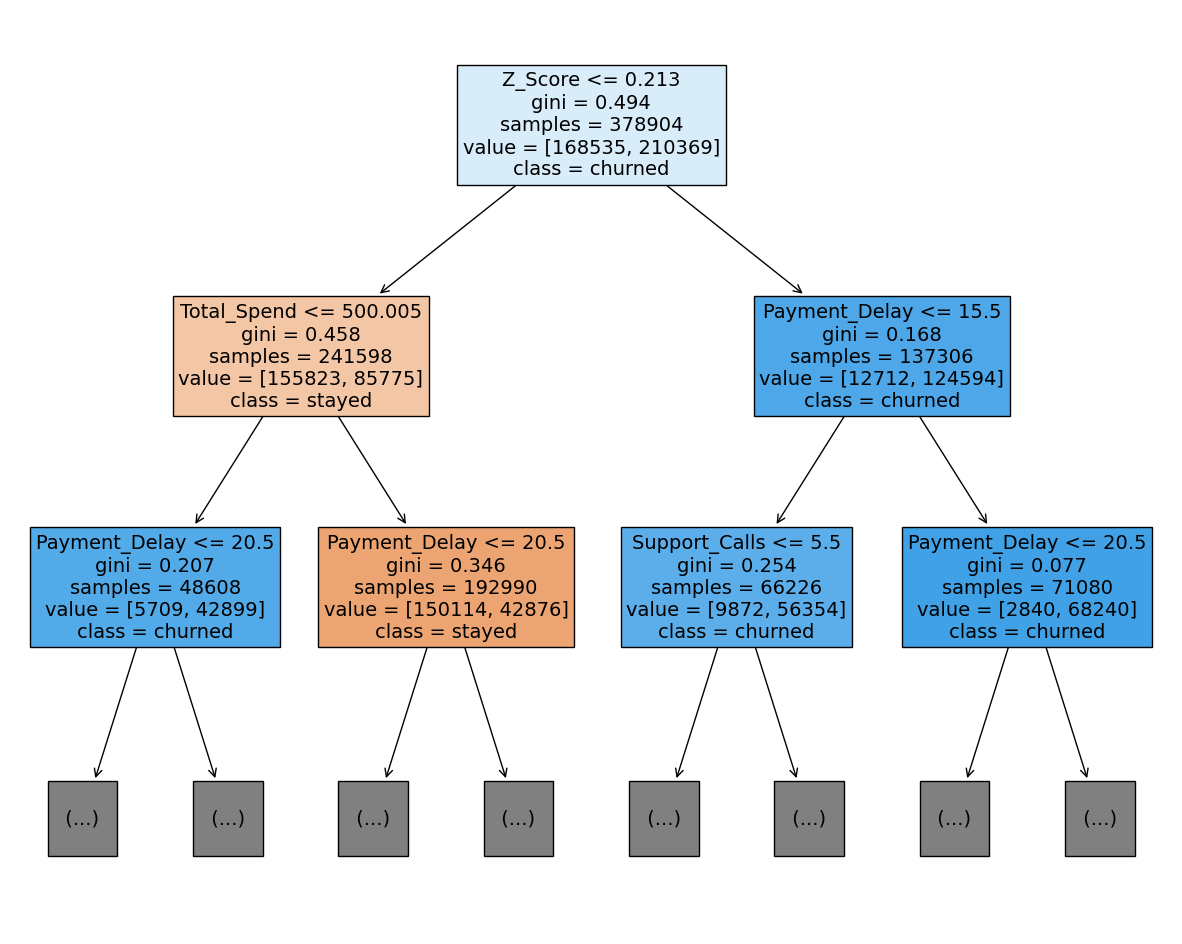

In [70]:
#Plot Tree
plt.figure(figsize=(15,12))
plot_tree(decision_tree,
          max_depth=2,
          feature_names=['Support_Calls', 'Payment_Delay', 'Total_Spend', 'Z_Score'],
          class_names=['stayed','churned'],
          fontsize=14,
          filled=True);
plt.show()

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

>The first line of information in each node is the feature and split point that the model identified as most predictive.
    
>The node at the top is known as **Root_Node**, while their off-shoots are known as **child_nodes**.
    
>At each node, if the answer to the question it asks is "Yes", the sample would move to the child node on the left. If the answer is "No", the sample would go to the child on the right.
    
>This plot tells us that if we were to do a single split on a single variable, the one that would most predict whether a customer will churn is Z_Score.
    
>Gini refers to the node's Gini Impurity, which is a measure of how pure(consisting of only one class) the node is. It measures from 0(having only one class) to 0.5(having equal representation of both classes).
    
>**Samples** refers to how many samples are in that node while **value** refers to the number of each class present in the node. The root node shows samples of 378,904 and value shows 168,535 customers stayed while 210,369 customers churned
    
>**Class** refers to the majority class in each node. At the **root_node** class=churned because the majority of customers in that node churned.

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">
    
## vi. Cross-Validated Hyperparameter Tuning 

In [71]:
#Instantiate the Classifier
tuned_decision_tree= DecisionTreeClassifier(random_state=101)

In [72]:
#Assign a dictionary of hyperparameters to search over
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
             'min_samples_leaf': [2, 5, 10, 20, 50]}

In [73]:
#Assign a set of scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

>Instantiate the GridSearchCV Object and pass the following arguments:
    
>The Classifier(*tuned_decision_tree*).

>The Dictionary of hyperparameters to search over(*tree_para*)

>The Set of Scoring Metrics(scoring)

>The number of cross-validation folds(cv=5).

>The scoring metric used by GridSearch to use when it selects the "best" model

In [74]:
%%time
# Instantiate the GridSearch
# clf = GridSearchCV(tuned_decision_tree, 
#                    tree_para, 
#                    scoring = scoring, 
#                    cv=5, 
#                    refit="f1")

# # Fit the model
# clf.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


In [75]:
# clf.best_estimator_

In [76]:
# print("Best_AVG_Validation_Score(F1_Score):",clf.best_score_)

In [77]:
#define a path to the folder where you want to save the model
path= 'C:\\Users\\Ebuka\\Downloads'

In [78]:
# pickle the model
# with open(path+'clf.pickle', 'wb') as to_write:
#     pickle.dump(clf, to_write)

In [79]:
# read in the pickled model
with open(path+'clf.pickle', 'rb') as to_read:
    clf= pickle.load(to_read)

In [80]:
%%time
clf.fit(X_train, y_train)
clf.best_params_

CPU times: total: 10min 9s
Wall time: 10min 31s


{'max_depth': 7, 'min_samples_leaf': 10}

In [81]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, random_state=101)

<div style="border-radius: 10px; padding: 15px; background-color: #ADD8E6; font-size: 115%; text-align: left;">

>Result from the GridSearch Cross Validation shows that the best hyperparameters to use are a max_depth of 7 and a min_samples_leaf of 10.

In [82]:
clf.best_score_

0.8886821710657203

In [83]:
# import os

In [84]:
# os.getcwd()